In [1]:
import os
import numpy as np
import torch
from PIL import Image
import yaml
from torchvision import transforms, datasets

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

<h1>TESTING DATA LOADERS</h1>

In [2]:
def get_label_names():
    with open('./dataset/synthia_3channels.yaml', 'r') as stream:
        synthiayaml = yaml.safe_load(stream)
    return synthiayaml['name']

In [3]:
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
from data.data_loader import *
target_loader = setup_loaders(['synthia'], ['train.txt'], 1)
targetloader_iter = enumerate(target_loader)

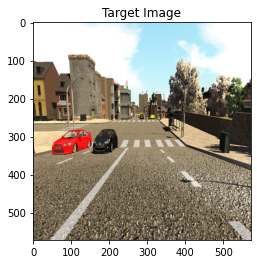

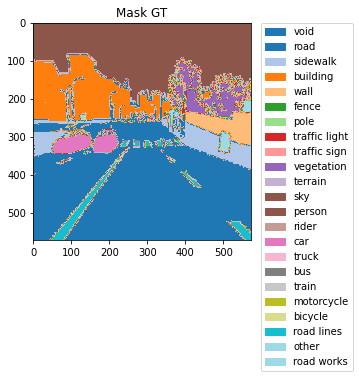

In [4]:
for i in range(1):
    _, batch = targetloader_iter.__next__()
    # Changed img = batch to img = batch[0] and defined mask
    img = batch[0]
    mask = batch[1]

    # Shows the target image
    from torchvision import transforms
    import matplotlib.pyplot as plt
    plt.figure()
    plt.title('Target Image')
    trans = transforms.ToPILImage()
    # Got rid of the one in (1, 3, 572, 572) dimensional array img[0]
    img = img[0,:,:,:]
    fig = plt.imshow(trans(img))

    # Shows the processed mask for the image
    plt.figure()
    plt.title('Mask GT')
    # Changed mask[0] to img[1]
    # Get rid of the one and four in (1, 4, 572, 572) in mask, making mask1 2D, picks the R channel
    mask1 = mask[0,:,:]
    values = np.unique(mask1.ravel())
    names = get_label_names()
    im = plt.imshow(mask1, cmap= 'tab20') #had tab20, nipy_spectral, gnuplot
    # get the colors of the values, according to the 
    # colormap used by imshow
    colors = [ im.cmap(im.norm(value)) for value in values]
    # create a patch (proxy artist) for every color 
    patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=names[i]) ) for i in range(len(values)) ]
    # put those patched as legend-handles into the legend
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )



<h1>MODEL TEST</h1>

In [5]:
def figure_draw(batch, net, device):
    img, mask= batch
    X, y = img.to(device), mask.to(device)
    pred_main = net(X)[0]
    output = pred_main.cpu().data.numpy()
    # output = output.transpose(axes=(1, 2, 0))
    pred = np.argmax(output, axis=0)

    plt.figure()
    plt.title('Image')
    trans = transforms.ToPILImage()
    plt.imshow(trans(img[0]))

    plt.figure()
    plt.title('Mask GT')
    # Changed mask[0] to img[1]
    # Get rid of the one and four in (1, 4, 572, 572) in mask, making mask1 2D, picks the R channel
    mask1 = mask[0,0,:,:]
    values = np.unique(mask1.ravel())
    names = get_label_names()
    im = plt.imshow(mask1, cmap= 'tab20') #had tab20, nipy_spectral, gnuplot
    # get the colors of the values, according to the 
    # colormap used by imshow
    colors = [ im.cmap(im.norm(value)) for value in values]
    # create a patch (proxy artist) for every color 
    patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=names[i]) ) for i in range(len(values)) ]
    # put those patched as legend-handles into the legend
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    
    plt.figure()
    plt.title('Pred')
    values = np.unique(pred.ravel())
    print(values)
    names = get_label_names()
    im = plt.imshow(pred, cmap= 'tab20') #had tab20, nipy_spectral, gnuplot
    # get the colors of the values, according to the 
    # colormap used by imshow
    colors = [ im.cmap(im.norm(value)) for value in values]
    # create a patch (proxy artist) for every color 
    patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=names[values[i]]) ) for i in range(len(values)) ]
    # put those patched as legend-handles into the legend
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )


<h1>TRAIN MODEL</h1>

Device: cuda
/notebooks
Dataset: synthia, Train set: 1596, Val set: 628
Training state restored from checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
Model restored from checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
Epoch 1, Itrs 9010/30000, Loss=0.101833
Epoch 1, Itrs 9020/30000, Loss=0.110392
Epoch 1, Itrs 9030/30000, Loss=0.115274
Epoch 1, Itrs 9040/30000, Loss=0.100781
Epoch 1, Itrs 9050/30000, Loss=0.106717
Epoch 1, Itrs 9060/30000, Loss=0.110826
Epoch 1, Itrs 9070/30000, Loss=0.114661
Epoch 1, Itrs 9080/30000, Loss=0.111400
Epoch 1, Itrs 9090/30000, Loss=0.108618
Epoch 1, Itrs 9100/30000, Loss=0.114395
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:47,  1.46it/s]



Overall Acc: 0.913483
Mean Acc: 0.441192
FreqW Acc: 0.849069
Mean IoU: 0.398017



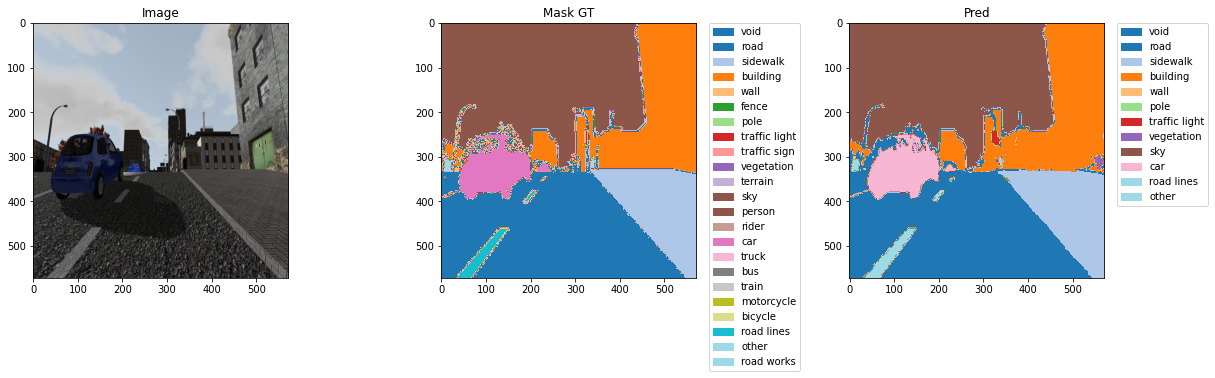

Epoch 1, Itrs 9110/30000, Loss=0.119637
Epoch 1, Itrs 9120/30000, Loss=0.106499
Epoch 1, Itrs 9130/30000, Loss=0.110467
Epoch 1, Itrs 9140/30000, Loss=0.103251
Epoch 1, Itrs 9150/30000, Loss=0.109364
Epoch 1, Itrs 9160/30000, Loss=0.112806
Epoch 1, Itrs 9170/30000, Loss=0.108593
Epoch 1, Itrs 9180/30000, Loss=0.114370
Epoch 1, Itrs 9190/30000, Loss=0.118032
Epoch 1, Itrs 9200/30000, Loss=0.113909
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.915029
Mean Acc: 0.444939
FreqW Acc: 0.852216
Mean IoU: 0.400254



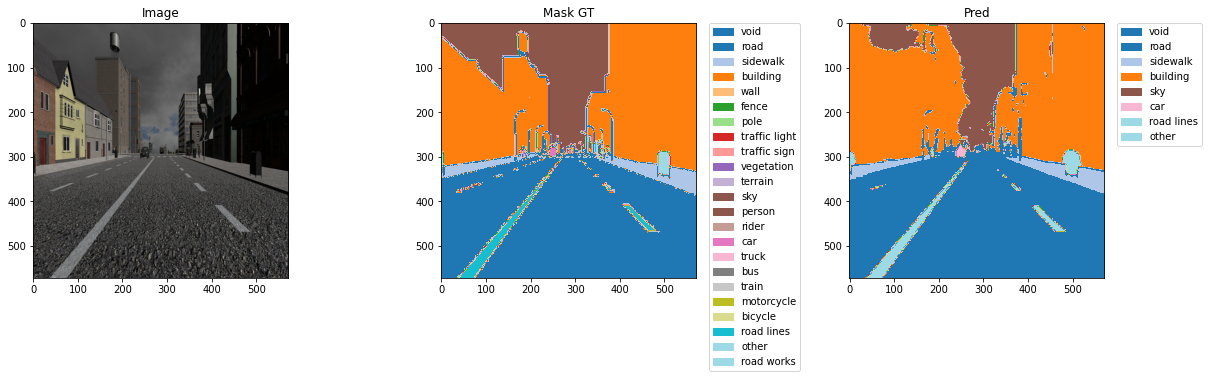

Epoch 1, Itrs 9210/30000, Loss=0.123538
Epoch 1, Itrs 9220/30000, Loss=0.102069
Epoch 1, Itrs 9230/30000, Loss=0.116614
Epoch 1, Itrs 9240/30000, Loss=0.107745
Epoch 1, Itrs 9250/30000, Loss=0.114483
Epoch 1, Itrs 9260/30000, Loss=0.112293
Epoch 1, Itrs 9270/30000, Loss=0.112745
Epoch 1, Itrs 9280/30000, Loss=0.109918
Epoch 1, Itrs 9290/30000, Loss=0.106519
Epoch 1, Itrs 9300/30000, Loss=0.113025
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.918274
Mean Acc: 0.446628
FreqW Acc: 0.857897
Mean IoU: 0.400918



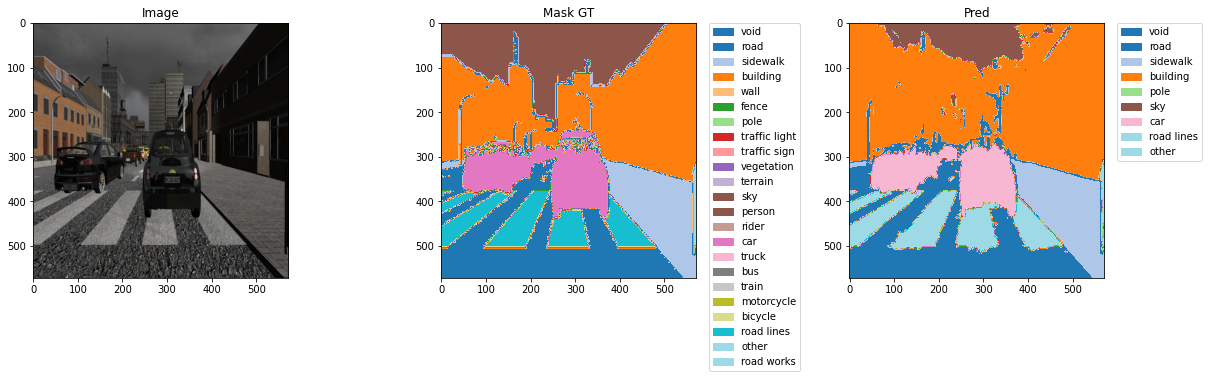

Model saved as checkpoints/best_deeplabv3plus_resnet50_synthia_os16.pth
Epoch 1, Itrs 9310/30000, Loss=0.101881
Epoch 1, Itrs 9320/30000, Loss=0.112768
Epoch 1, Itrs 9330/30000, Loss=0.115528
Epoch 1, Itrs 9340/30000, Loss=0.111104
Epoch 1, Itrs 9350/30000, Loss=0.110824
Epoch 1, Itrs 9360/30000, Loss=0.107957
Epoch 1, Itrs 9370/30000, Loss=0.109292
Epoch 1, Itrs 9380/30000, Loss=0.108515
Epoch 1, Itrs 9390/30000, Loss=0.111944
Epoch 2, Itrs 9400/30000, Loss=0.117179
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.913439
Mean Acc: 0.441985
FreqW Acc: 0.849349
Mean IoU: 0.398594



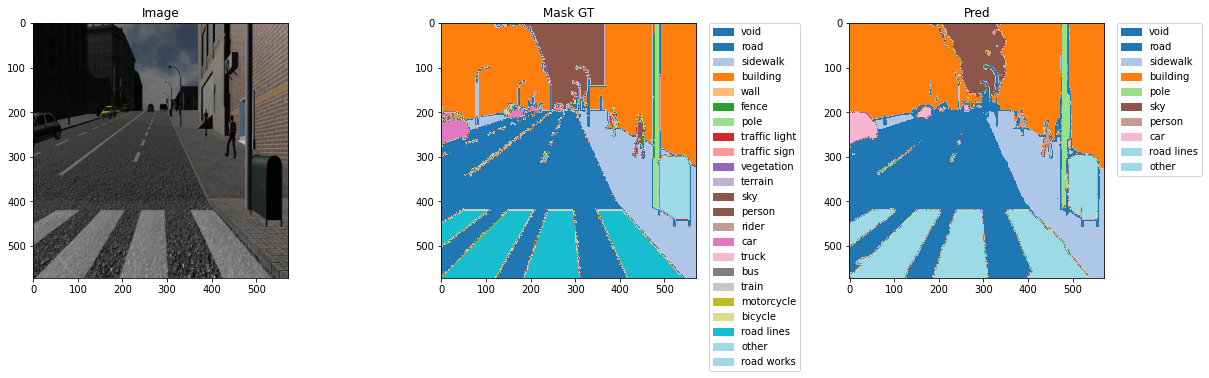

Epoch 2, Itrs 9410/30000, Loss=0.112177
Epoch 2, Itrs 9420/30000, Loss=0.108364
Epoch 2, Itrs 9430/30000, Loss=0.111478
Epoch 2, Itrs 9440/30000, Loss=0.108473
Epoch 2, Itrs 9450/30000, Loss=0.113940
Epoch 2, Itrs 9460/30000, Loss=0.114765
Epoch 2, Itrs 9470/30000, Loss=0.114148
Epoch 2, Itrs 9480/30000, Loss=0.118504
Epoch 2, Itrs 9490/30000, Loss=0.108208
Epoch 2, Itrs 9500/30000, Loss=0.112279
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.915059
Mean Acc: 0.444835
FreqW Acc: 0.852133
Mean IoU: 0.399646



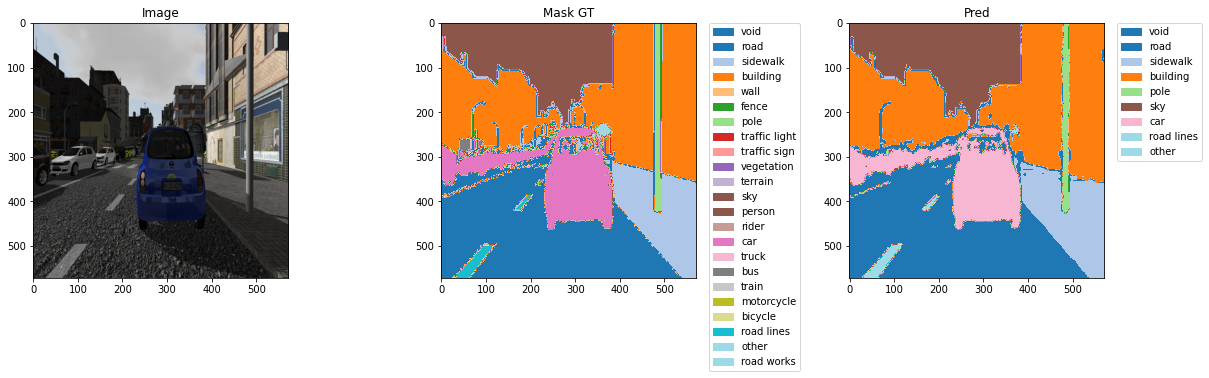

Epoch 2, Itrs 9510/30000, Loss=0.111423
Epoch 2, Itrs 9520/30000, Loss=0.118946
Epoch 2, Itrs 9530/30000, Loss=0.100089
Epoch 2, Itrs 9540/30000, Loss=0.116439
Epoch 2, Itrs 9550/30000, Loss=0.106579
Epoch 2, Itrs 9560/30000, Loss=0.117363
Epoch 2, Itrs 9570/30000, Loss=0.118364
Epoch 2, Itrs 9580/30000, Loss=0.117369
Epoch 2, Itrs 9590/30000, Loss=0.107308
Epoch 2, Itrs 9600/30000, Loss=0.117804
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.915324
Mean Acc: 0.444045
FreqW Acc: 0.852558
Mean IoU: 0.400198



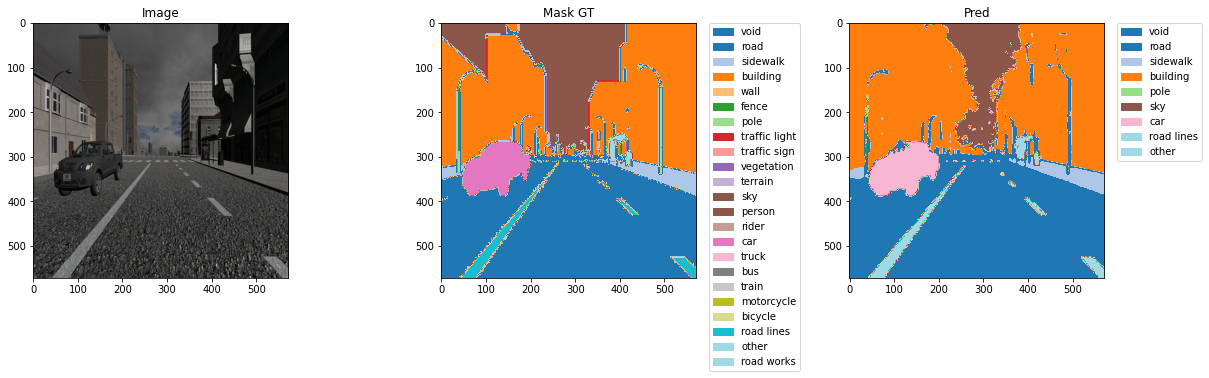

Epoch 2, Itrs 9610/30000, Loss=0.114156
Epoch 2, Itrs 9620/30000, Loss=0.115027
Epoch 2, Itrs 9630/30000, Loss=0.111062
Epoch 2, Itrs 9640/30000, Loss=0.104469
Epoch 2, Itrs 9650/30000, Loss=0.112587
Epoch 2, Itrs 9660/30000, Loss=0.116120
Epoch 2, Itrs 9670/30000, Loss=0.118248
Epoch 2, Itrs 9680/30000, Loss=0.106062
Epoch 2, Itrs 9690/30000, Loss=0.112590
Epoch 2, Itrs 9700/30000, Loss=0.106690
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.918334
Mean Acc: 0.447430
FreqW Acc: 0.857836
Mean IoU: 0.402306



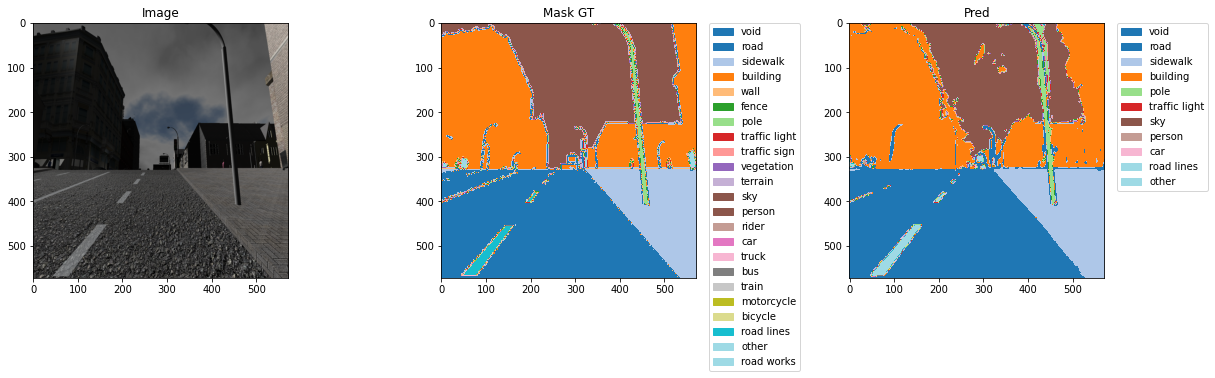

Model saved as checkpoints/best_deeplabv3plus_resnet50_synthia_os16.pth
Epoch 2, Itrs 9710/30000, Loss=0.113534
Epoch 2, Itrs 9720/30000, Loss=0.110358
Epoch 2, Itrs 9730/30000, Loss=0.105884
Epoch 2, Itrs 9740/30000, Loss=0.109894
Epoch 2, Itrs 9750/30000, Loss=0.107066
Epoch 2, Itrs 9760/30000, Loss=0.116685
Epoch 2, Itrs 9770/30000, Loss=0.117515
Epoch 2, Itrs 9780/30000, Loss=0.115577
Epoch 2, Itrs 9790/30000, Loss=0.111547
Epoch 3, Itrs 9800/30000, Loss=0.108359
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.917316
Mean Acc: 0.446701
FreqW Acc: 0.856147
Mean IoU: 0.401737



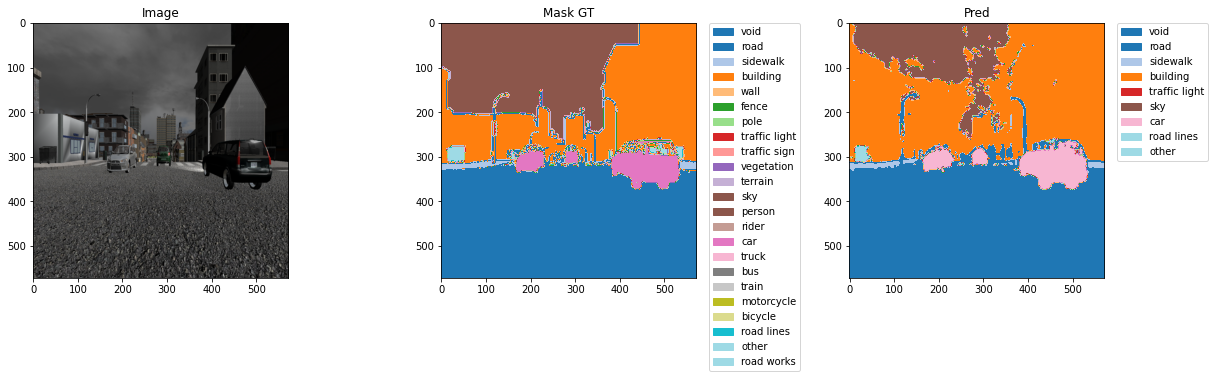

Epoch 3, Itrs 9810/30000, Loss=0.108097
Epoch 3, Itrs 9820/30000, Loss=0.110966
Epoch 3, Itrs 9830/30000, Loss=0.107435
Epoch 3, Itrs 9840/30000, Loss=0.110083
Epoch 3, Itrs 9850/30000, Loss=0.107554
Epoch 3, Itrs 9860/30000, Loss=0.120495
Epoch 3, Itrs 9870/30000, Loss=0.112440
Epoch 3, Itrs 9880/30000, Loss=0.124697
Epoch 3, Itrs 9890/30000, Loss=0.110985
Epoch 3, Itrs 9900/30000, Loss=0.115659
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.918341
Mean Acc: 0.446756
FreqW Acc: 0.857690
Mean IoU: 0.402077



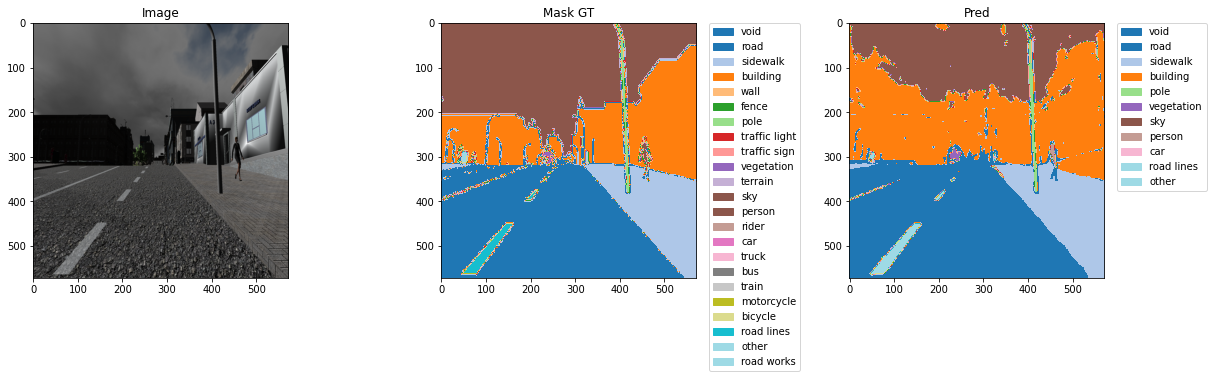

Epoch 3, Itrs 9910/30000, Loss=0.113144
Epoch 3, Itrs 9920/30000, Loss=0.112418
Epoch 3, Itrs 9930/30000, Loss=0.115657
Epoch 3, Itrs 9940/30000, Loss=0.107854
Epoch 3, Itrs 9950/30000, Loss=0.118596
Epoch 3, Itrs 9960/30000, Loss=0.108256
Epoch 3, Itrs 9970/30000, Loss=0.111337
Epoch 3, Itrs 9980/30000, Loss=0.107478
Epoch 3, Itrs 9990/30000, Loss=0.111114
Epoch 3, Itrs 10000/30000, Loss=0.111546
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.918479
Mean Acc: 0.447964
FreqW Acc: 0.858183
Mean IoU: 0.403040



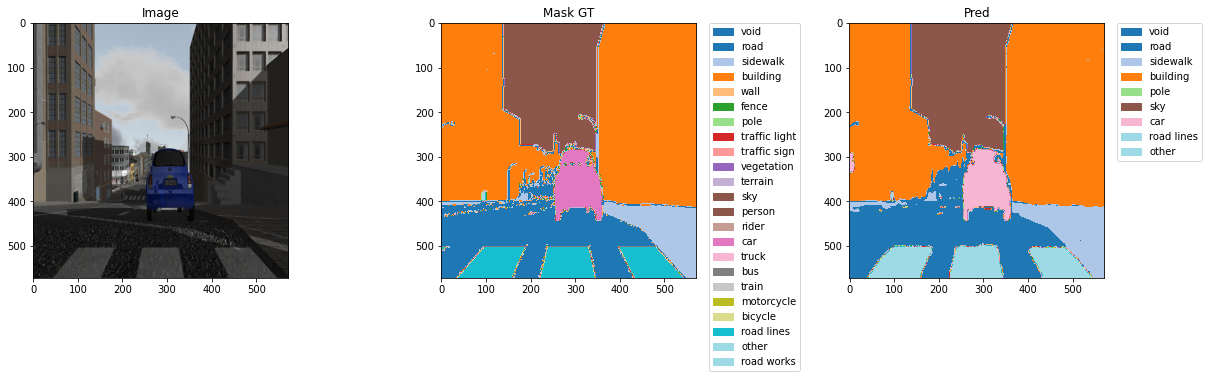

Model saved as checkpoints/best_deeplabv3plus_resnet50_synthia_os16.pth
Epoch 3, Itrs 10010/30000, Loss=0.108286
Epoch 3, Itrs 10020/30000, Loss=0.113908
Epoch 3, Itrs 10030/30000, Loss=0.108942
Epoch 3, Itrs 10040/30000, Loss=0.111464
Epoch 3, Itrs 10050/30000, Loss=0.103145
Epoch 3, Itrs 10060/30000, Loss=0.110645
Epoch 3, Itrs 10070/30000, Loss=0.107430
Epoch 3, Itrs 10080/30000, Loss=0.113581
Epoch 3, Itrs 10090/30000, Loss=0.111178
Epoch 3, Itrs 10100/30000, Loss=0.112892
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.912639
Mean Acc: 0.443952
FreqW Acc: 0.848041
Mean IoU: 0.399376



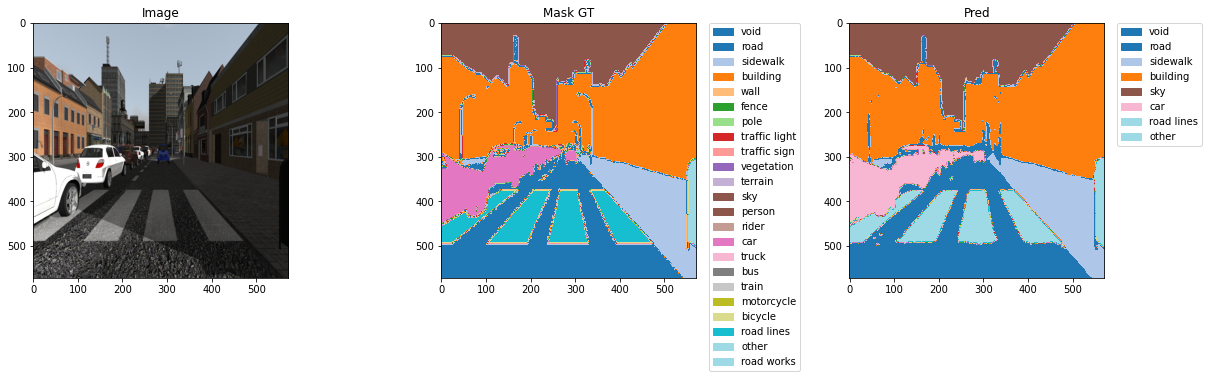

Epoch 3, Itrs 10110/30000, Loss=0.119560
Epoch 3, Itrs 10120/30000, Loss=0.113542
Epoch 3, Itrs 10130/30000, Loss=0.107948
Epoch 3, Itrs 10140/30000, Loss=0.113058
Epoch 3, Itrs 10150/30000, Loss=0.123174
Epoch 3, Itrs 10160/30000, Loss=0.112054
Epoch 3, Itrs 10170/30000, Loss=0.110428
Epoch 3, Itrs 10180/30000, Loss=0.111484
Epoch 3, Itrs 10190/30000, Loss=0.113509
Epoch 4, Itrs 10200/30000, Loss=0.101203
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.914638
Mean Acc: 0.445161
FreqW Acc: 0.851190
Mean IoU: 0.400559



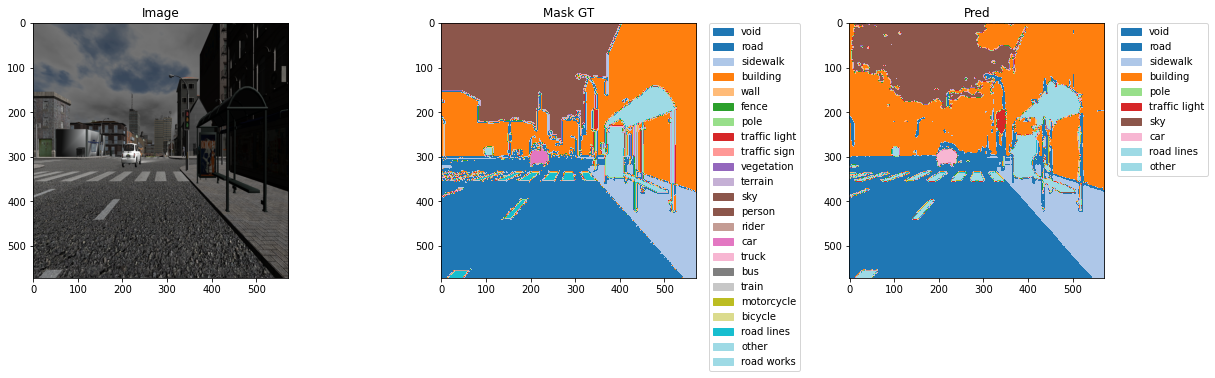

Epoch 4, Itrs 10210/30000, Loss=0.114806
Epoch 4, Itrs 10220/30000, Loss=0.110659
Epoch 4, Itrs 10230/30000, Loss=0.118127
Epoch 4, Itrs 10240/30000, Loss=0.109285
Epoch 4, Itrs 10250/30000, Loss=0.114963
Epoch 4, Itrs 10260/30000, Loss=0.110105
Epoch 4, Itrs 10270/30000, Loss=0.114167
Epoch 4, Itrs 10280/30000, Loss=0.114918
Epoch 4, Itrs 10290/30000, Loss=0.117429
Epoch 4, Itrs 10300/30000, Loss=0.106732
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.916537
Mean Acc: 0.442698
FreqW Acc: 0.854373
Mean IoU: 0.400402



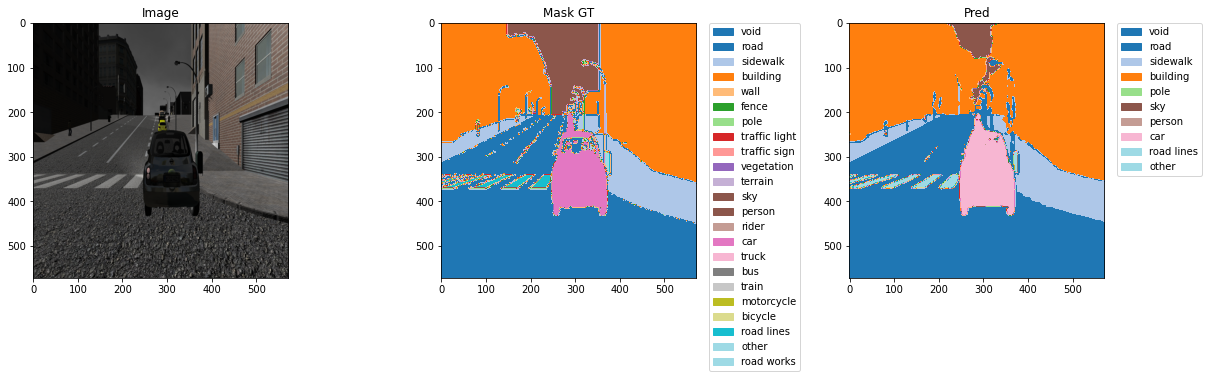

Epoch 4, Itrs 10310/30000, Loss=0.112602
Epoch 4, Itrs 10320/30000, Loss=0.111493
Epoch 4, Itrs 10330/30000, Loss=0.112909
Epoch 4, Itrs 10340/30000, Loss=0.113767
Epoch 4, Itrs 10350/30000, Loss=0.108232
Epoch 4, Itrs 10360/30000, Loss=0.115467
Epoch 4, Itrs 10370/30000, Loss=0.104398
Epoch 4, Itrs 10380/30000, Loss=0.108418
Epoch 4, Itrs 10390/30000, Loss=0.116850
Epoch 4, Itrs 10400/30000, Loss=0.105554
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.916896
Mean Acc: 0.444528
FreqW Acc: 0.855169
Mean IoU: 0.401229



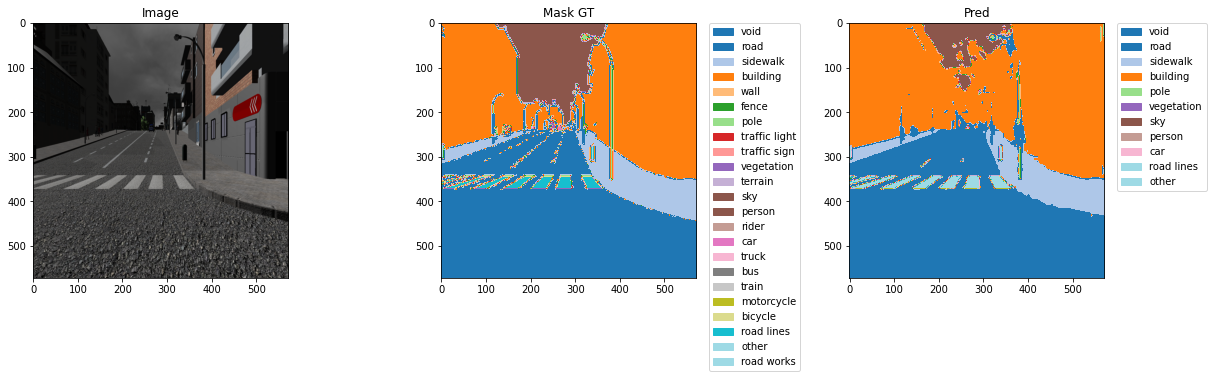

Epoch 4, Itrs 10410/30000, Loss=0.109649
Epoch 4, Itrs 10420/30000, Loss=0.118016
Epoch 4, Itrs 10430/30000, Loss=0.106999
Epoch 4, Itrs 10440/30000, Loss=0.110696
Epoch 4, Itrs 10450/30000, Loss=0.120494
Epoch 4, Itrs 10460/30000, Loss=0.107663
Epoch 4, Itrs 10470/30000, Loss=0.103640
Epoch 4, Itrs 10480/30000, Loss=0.109033
Epoch 4, Itrs 10490/30000, Loss=0.124083
Epoch 4, Itrs 10500/30000, Loss=0.114563
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.917122
Mean Acc: 0.446221
FreqW Acc: 0.855658
Mean IoU: 0.402070



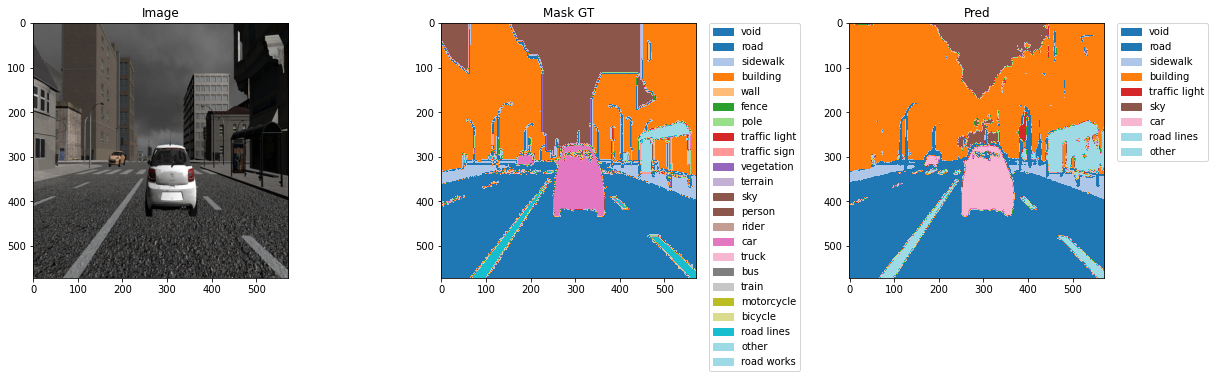

Epoch 4, Itrs 10510/30000, Loss=0.117147
Epoch 4, Itrs 10520/30000, Loss=0.112851
Epoch 4, Itrs 10530/30000, Loss=0.113237
Epoch 4, Itrs 10540/30000, Loss=0.113431
Epoch 4, Itrs 10550/30000, Loss=0.102588
Epoch 4, Itrs 10560/30000, Loss=0.105789
Epoch 4, Itrs 10570/30000, Loss=0.103914
Epoch 4, Itrs 10580/30000, Loss=0.110194
Epoch 4, Itrs 10590/30000, Loss=0.116846
Epoch 5, Itrs 10600/30000, Loss=0.111466
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.918132
Mean Acc: 0.444514
FreqW Acc: 0.857210
Mean IoU: 0.401263



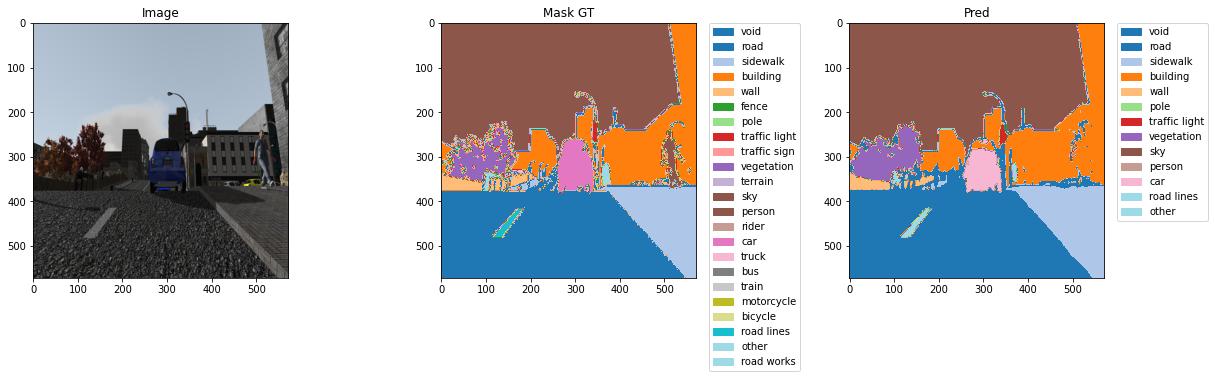

Epoch 5, Itrs 10610/30000, Loss=0.120540
Epoch 5, Itrs 10620/30000, Loss=0.114728
Epoch 5, Itrs 10630/30000, Loss=0.119890
Epoch 5, Itrs 10640/30000, Loss=0.110549
Epoch 5, Itrs 10650/30000, Loss=0.117050
Epoch 5, Itrs 10660/30000, Loss=0.106390
Epoch 5, Itrs 10670/30000, Loss=0.111176
Epoch 5, Itrs 10680/30000, Loss=0.107999
Epoch 5, Itrs 10690/30000, Loss=0.111508
Epoch 5, Itrs 10700/30000, Loss=0.109982
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:48,  1.44it/s]



Overall Acc: 0.916971
Mean Acc: 0.445237
FreqW Acc: 0.855118
Mean IoU: 0.401795



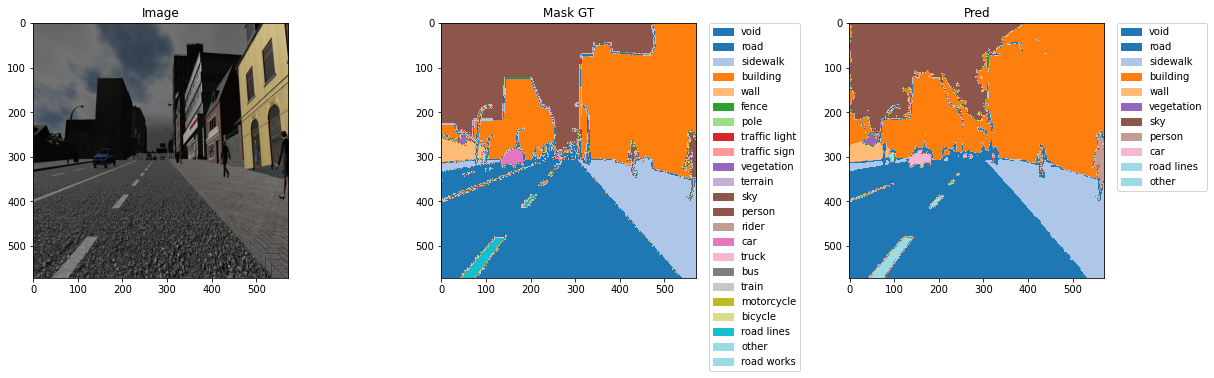

Epoch 5, Itrs 10710/30000, Loss=0.118220
Epoch 5, Itrs 10720/30000, Loss=0.109905
Epoch 5, Itrs 10730/30000, Loss=0.111470
Epoch 5, Itrs 10740/30000, Loss=0.110215
Epoch 5, Itrs 10750/30000, Loss=0.116227
Epoch 5, Itrs 10760/30000, Loss=0.115363
Epoch 5, Itrs 10770/30000, Loss=0.108412
Epoch 5, Itrs 10780/30000, Loss=0.113692
Epoch 5, Itrs 10790/30000, Loss=0.103964
Epoch 5, Itrs 10800/30000, Loss=0.107906
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:47,  1.45it/s]



Overall Acc: 0.918561
Mean Acc: 0.446041
FreqW Acc: 0.857650
Mean IoU: 0.402756



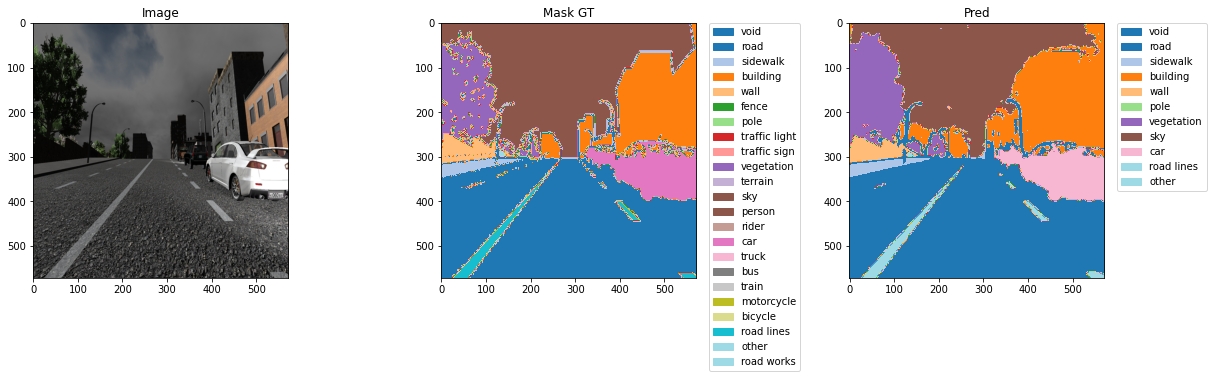

Epoch 5, Itrs 10810/30000, Loss=0.106439
Epoch 5, Itrs 10820/30000, Loss=0.104196
Epoch 5, Itrs 10830/30000, Loss=0.115345
Epoch 5, Itrs 10840/30000, Loss=0.114221
Epoch 5, Itrs 10850/30000, Loss=0.105774
Epoch 5, Itrs 10860/30000, Loss=0.109509
Epoch 5, Itrs 10870/30000, Loss=0.110878
Epoch 5, Itrs 10880/30000, Loss=0.110637
Epoch 5, Itrs 10890/30000, Loss=0.110846
Epoch 5, Itrs 10900/30000, Loss=0.106175
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:48,  1.45it/s]



Overall Acc: 0.916219
Mean Acc: 0.444638
FreqW Acc: 0.853978
Mean IoU: 0.401497



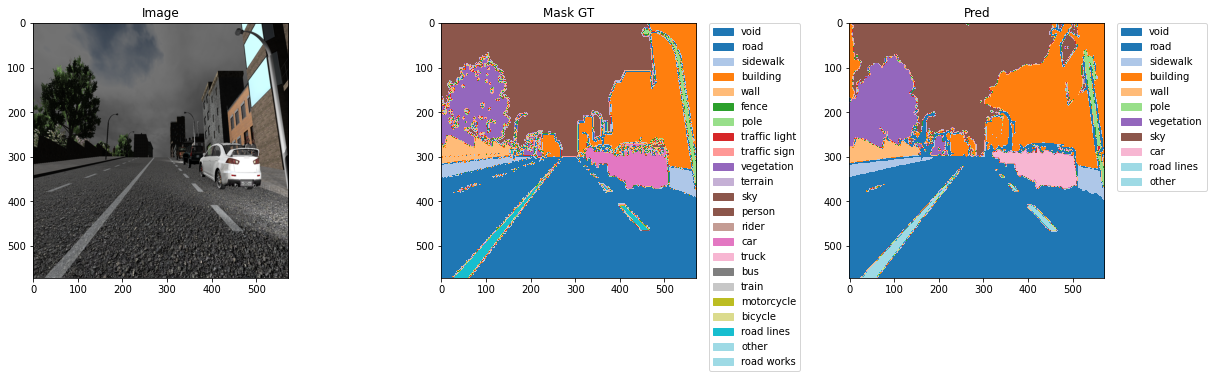

Epoch 5, Itrs 10910/30000, Loss=0.110297
Epoch 5, Itrs 10920/30000, Loss=0.110046
Epoch 5, Itrs 10930/30000, Loss=0.118630
Epoch 5, Itrs 10940/30000, Loss=0.105815
Epoch 5, Itrs 10950/30000, Loss=0.109298
Epoch 5, Itrs 10960/30000, Loss=0.115550
Epoch 5, Itrs 10970/30000, Loss=0.111994
Epoch 5, Itrs 10980/30000, Loss=0.111876
Epoch 5, Itrs 10990/30000, Loss=0.117997
Epoch 6, Itrs 11000/30000, Loss=0.113768
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:49,  1.43it/s]



Overall Acc: 0.913737
Mean Acc: 0.447127
FreqW Acc: 0.849798
Mean IoU: 0.401981



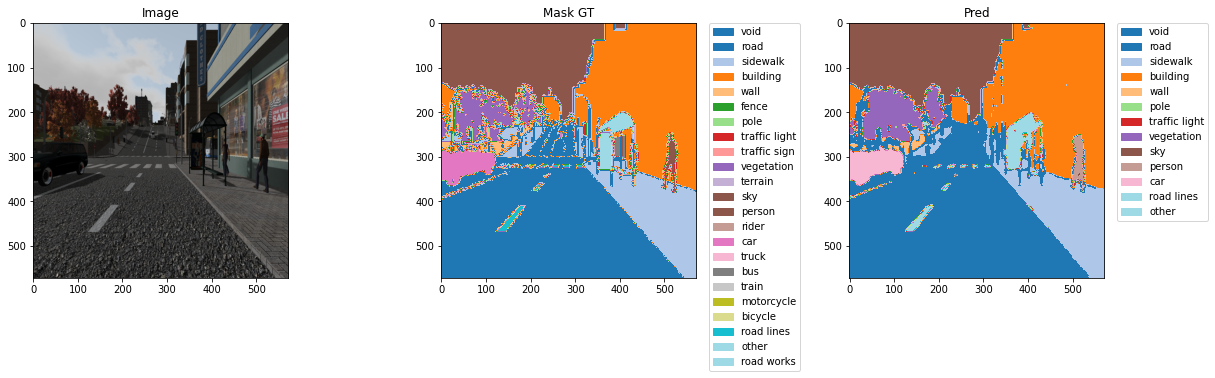

Epoch 6, Itrs 11010/30000, Loss=0.117835
Epoch 6, Itrs 11020/30000, Loss=0.114356
Epoch 6, Itrs 11030/30000, Loss=0.103966
Epoch 6, Itrs 11040/30000, Loss=0.107584
Epoch 6, Itrs 11050/30000, Loss=0.107164
Epoch 6, Itrs 11060/30000, Loss=0.114999
Epoch 6, Itrs 11070/30000, Loss=0.101654
Epoch 6, Itrs 11080/30000, Loss=0.113462
Epoch 6, Itrs 11090/30000, Loss=0.120892
Epoch 6, Itrs 11100/30000, Loss=0.109063
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:48,  1.45it/s]



Overall Acc: 0.918983
Mean Acc: 0.447804
FreqW Acc: 0.858749
Mean IoU: 0.403518



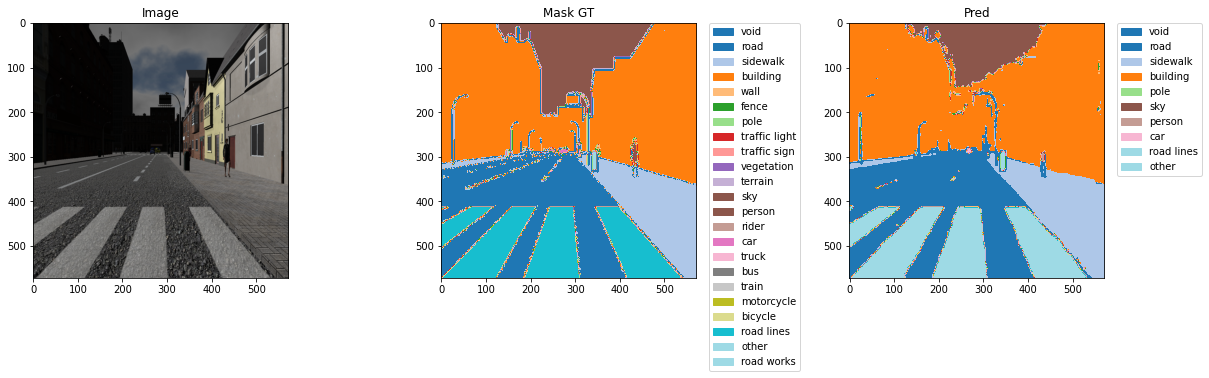

Model saved as checkpoints/best_deeplabv3plus_resnet50_synthia_os16.pth
Epoch 6, Itrs 11110/30000, Loss=0.115393
Epoch 6, Itrs 11120/30000, Loss=0.115707
Epoch 6, Itrs 11130/30000, Loss=0.104264
Epoch 6, Itrs 11140/30000, Loss=0.102701
Epoch 6, Itrs 11150/30000, Loss=0.111536
Epoch 6, Itrs 11160/30000, Loss=0.111429
Epoch 6, Itrs 11170/30000, Loss=0.111539
Epoch 6, Itrs 11180/30000, Loss=0.110808
Epoch 6, Itrs 11190/30000, Loss=0.113298
Epoch 6, Itrs 11200/30000, Loss=0.117692
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.915460
Mean Acc: 0.446652
FreqW Acc: 0.852878
Mean IoU: 0.402200



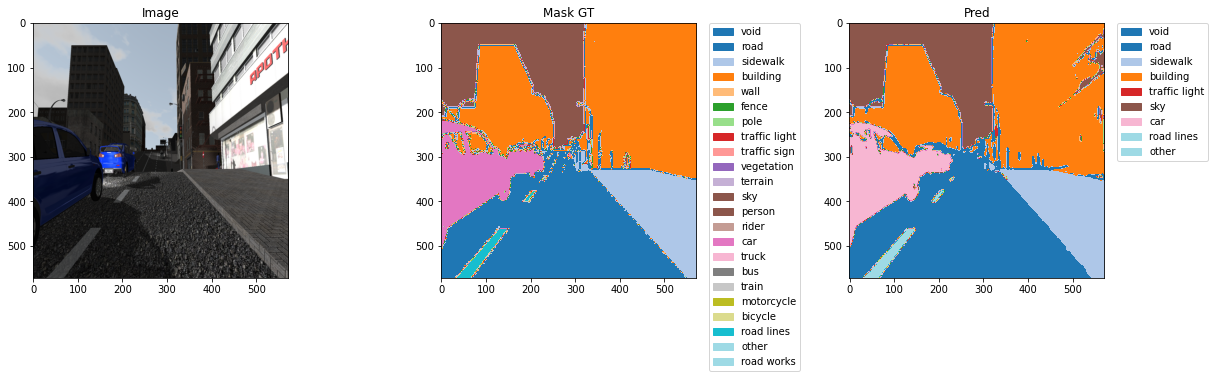

Epoch 6, Itrs 11210/30000, Loss=0.104479
Epoch 6, Itrs 11220/30000, Loss=0.105597
Epoch 6, Itrs 11230/30000, Loss=0.109651
Epoch 6, Itrs 11240/30000, Loss=0.115057
Epoch 6, Itrs 11250/30000, Loss=0.112102
Epoch 6, Itrs 11260/30000, Loss=0.106453
Epoch 6, Itrs 11270/30000, Loss=0.109047
Epoch 6, Itrs 11280/30000, Loss=0.118409
Epoch 6, Itrs 11290/30000, Loss=0.119564
Epoch 6, Itrs 11300/30000, Loss=0.107654
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.48it/s]



Overall Acc: 0.916887
Mean Acc: 0.447799
FreqW Acc: 0.855088
Mean IoU: 0.402909



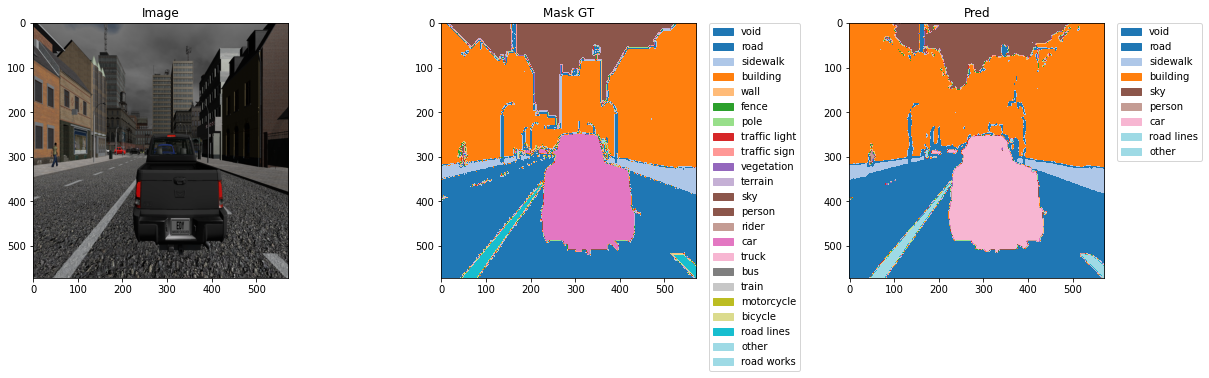

Epoch 6, Itrs 11310/30000, Loss=0.110452
Epoch 6, Itrs 11320/30000, Loss=0.110450
Epoch 6, Itrs 11330/30000, Loss=0.113236
Epoch 6, Itrs 11340/30000, Loss=0.111365
Epoch 6, Itrs 11350/30000, Loss=0.104359
Epoch 6, Itrs 11360/30000, Loss=0.109808
Epoch 6, Itrs 11370/30000, Loss=0.110610
Epoch 6, Itrs 11380/30000, Loss=0.103810
Epoch 6, Itrs 11390/30000, Loss=0.108911
Epoch 7, Itrs 11400/30000, Loss=0.111714
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.916765
Mean Acc: 0.447726
FreqW Acc: 0.854892
Mean IoU: 0.403420



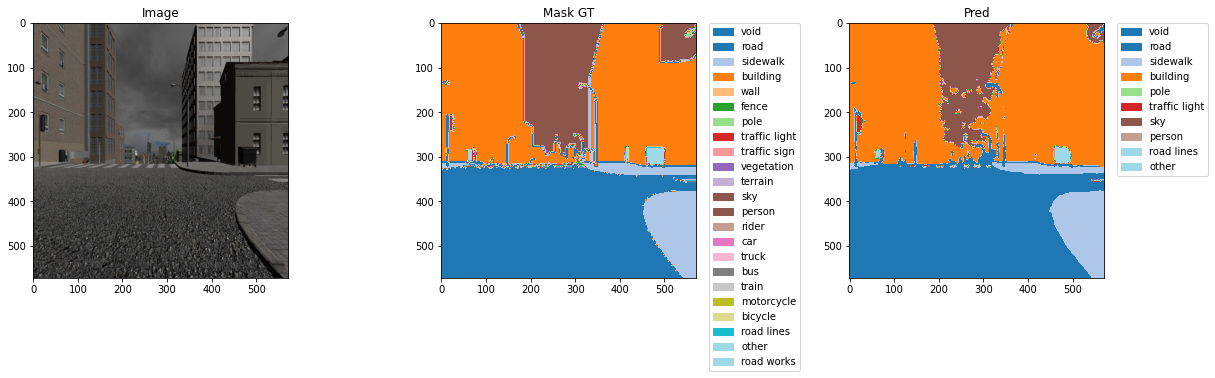

Epoch 7, Itrs 11410/30000, Loss=0.109748
Epoch 7, Itrs 11420/30000, Loss=0.104031
Epoch 7, Itrs 11430/30000, Loss=0.113370
Epoch 7, Itrs 11440/30000, Loss=0.114156
Epoch 7, Itrs 11450/30000, Loss=0.116415
Epoch 7, Itrs 11460/30000, Loss=0.114916
Epoch 7, Itrs 11470/30000, Loss=0.114697
Epoch 7, Itrs 11480/30000, Loss=0.103970
Epoch 7, Itrs 11490/30000, Loss=0.107219
Epoch 7, Itrs 11500/30000, Loss=0.108572
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.48it/s]



Overall Acc: 0.918703
Mean Acc: 0.447271
FreqW Acc: 0.858068
Mean IoU: 0.403492



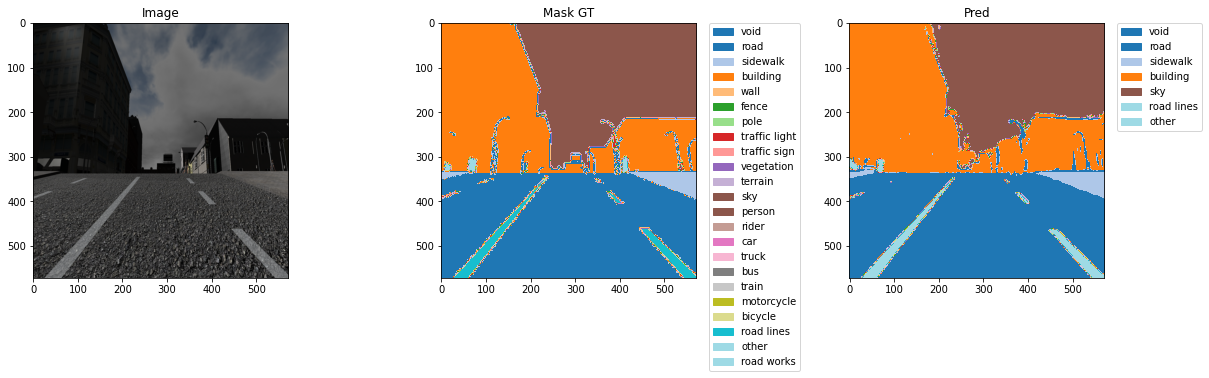

Epoch 7, Itrs 11510/30000, Loss=0.112635
Epoch 7, Itrs 11520/30000, Loss=0.109772
Epoch 7, Itrs 11530/30000, Loss=0.101586
Epoch 7, Itrs 11540/30000, Loss=0.104682
Epoch 7, Itrs 11550/30000, Loss=0.116246
Epoch 7, Itrs 11560/30000, Loss=0.109909
Epoch 7, Itrs 11570/30000, Loss=0.113789
Epoch 7, Itrs 11580/30000, Loss=0.105527
Epoch 7, Itrs 11590/30000, Loss=0.097924
Epoch 7, Itrs 11600/30000, Loss=0.117686
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.48it/s]



Overall Acc: 0.919797
Mean Acc: 0.447685
FreqW Acc: 0.860282
Mean IoU: 0.404170



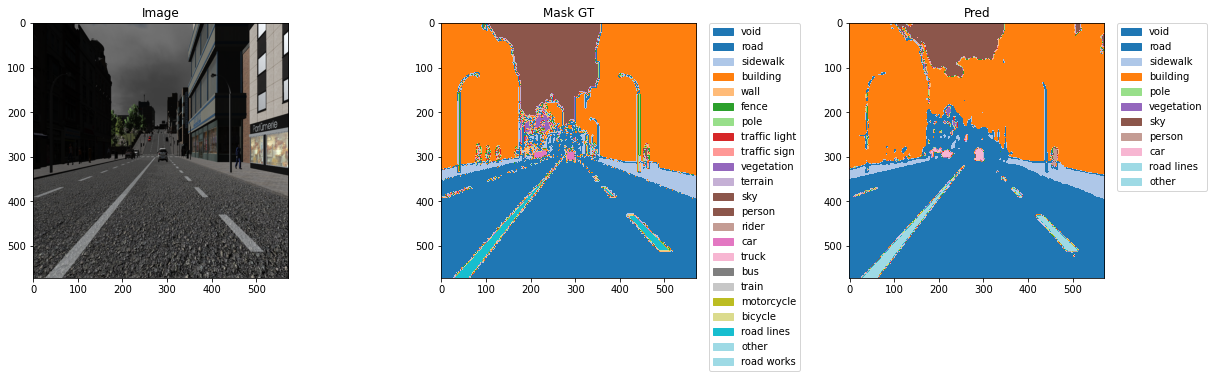

Model saved as checkpoints/best_deeplabv3plus_resnet50_synthia_os16.pth
Epoch 7, Itrs 11610/30000, Loss=0.114499
Epoch 7, Itrs 11620/30000, Loss=0.111935
Epoch 7, Itrs 11630/30000, Loss=0.109355
Epoch 7, Itrs 11640/30000, Loss=0.108462
Epoch 7, Itrs 11650/30000, Loss=0.115628
Epoch 7, Itrs 11660/30000, Loss=0.107670
Epoch 7, Itrs 11670/30000, Loss=0.113087
Epoch 7, Itrs 11680/30000, Loss=0.103072
Epoch 7, Itrs 11690/30000, Loss=0.122293
Epoch 7, Itrs 11700/30000, Loss=0.109095
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.48it/s]



Overall Acc: 0.914148
Mean Acc: 0.445115
FreqW Acc: 0.850386
Mean IoU: 0.401877



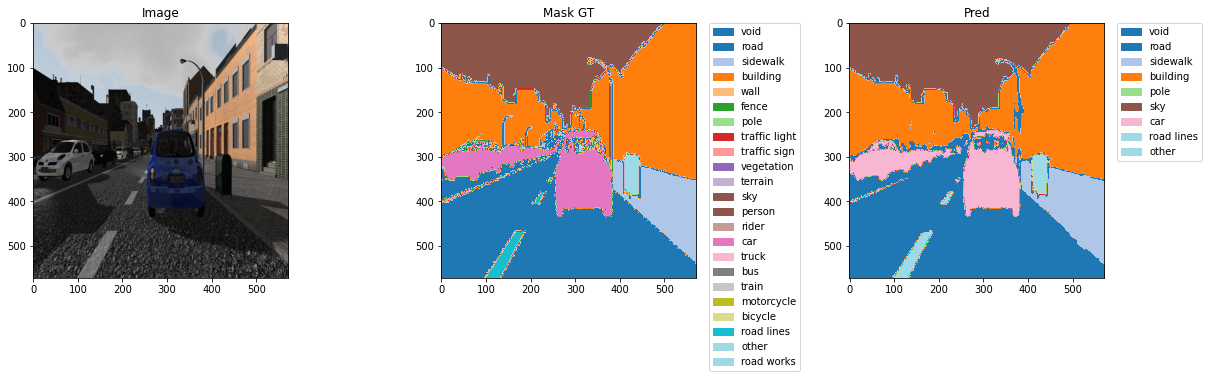

Epoch 7, Itrs 11710/30000, Loss=0.125530
Epoch 7, Itrs 11720/30000, Loss=0.101123
Epoch 7, Itrs 11730/30000, Loss=0.106205
Epoch 7, Itrs 11740/30000, Loss=0.106609
Epoch 7, Itrs 11750/30000, Loss=0.111707
Epoch 7, Itrs 11760/30000, Loss=0.109940
Epoch 7, Itrs 11770/30000, Loss=0.111559
Epoch 7, Itrs 11780/30000, Loss=0.109127
Epoch 7, Itrs 11790/30000, Loss=0.110725
Epoch 8, Itrs 11800/30000, Loss=0.117431
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.48it/s]



Overall Acc: 0.917396
Mean Acc: 0.447653
FreqW Acc: 0.856175
Mean IoU: 0.404134



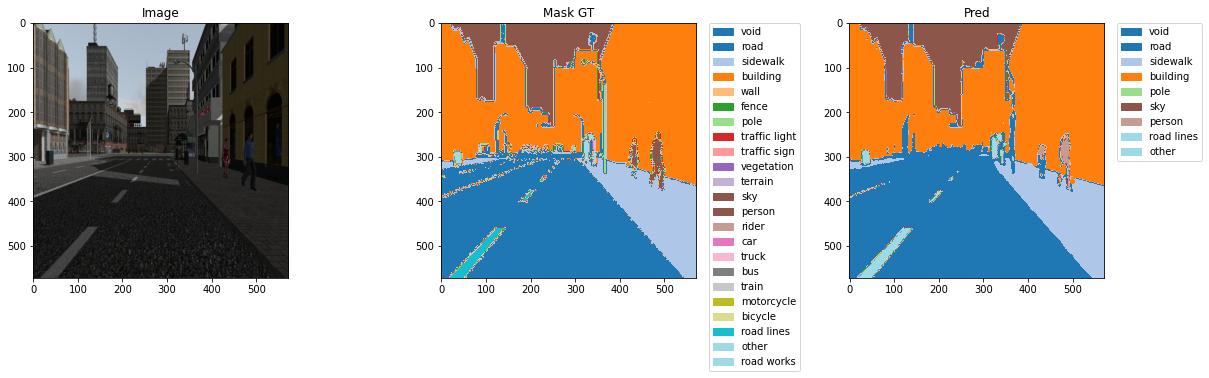

Epoch 8, Itrs 11810/30000, Loss=0.119962
Epoch 8, Itrs 11820/30000, Loss=0.110801
Epoch 8, Itrs 11830/30000, Loss=0.111123
Epoch 8, Itrs 11840/30000, Loss=0.110895
Epoch 8, Itrs 11850/30000, Loss=0.113383
Epoch 8, Itrs 11860/30000, Loss=0.107193
Epoch 8, Itrs 11870/30000, Loss=0.113744
Epoch 8, Itrs 11880/30000, Loss=0.112269
Epoch 8, Itrs 11890/30000, Loss=0.112200
Epoch 8, Itrs 11900/30000, Loss=0.116494
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


157it [01:46,  1.47it/s]



Overall Acc: 0.916781
Mean Acc: 0.446349
FreqW Acc: 0.854816
Mean IoU: 0.402886



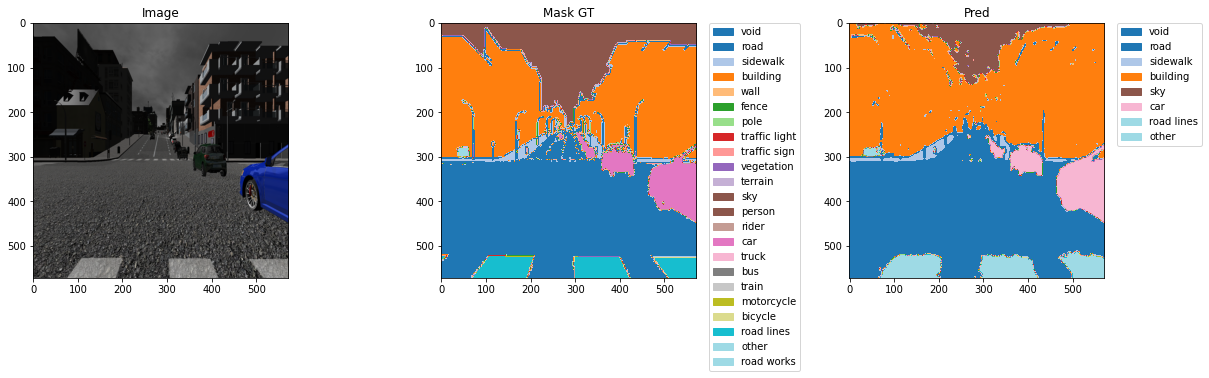

Epoch 8, Itrs 11910/30000, Loss=0.119481
Epoch 8, Itrs 11920/30000, Loss=0.116661
Epoch 8, Itrs 11930/30000, Loss=0.108828
Epoch 8, Itrs 11940/30000, Loss=0.114071
Epoch 8, Itrs 11950/30000, Loss=0.103662
Epoch 8, Itrs 11960/30000, Loss=0.113108
Epoch 8, Itrs 11970/30000, Loss=0.108198
Epoch 8, Itrs 11980/30000, Loss=0.110559
Epoch 8, Itrs 11990/30000, Loss=0.107222
Epoch 8, Itrs 12000/30000, Loss=0.104964
Model saved as checkpoints/latest_deeplabv3plus_resnet50_synthia_os16.pth
validation...


96it [01:05,  1.48it/s]

In [ ]:
%run -i models/DeepLabV3Plus/main.py

In [ ]:
%run -i models/DeepLabV3Plus/predict.py 

<h3>DELETES CHECKPOINTS FOR UNET</h3>

In [8]:
import pathlib
if (False):
    path_string = 'checkpoints/Sourceonly_SingleBranch_CommonClasses__Source_synthia_Target_synthia/'
    path = pathlib.Path(path_string)
    for file in path.iterdir():
        file.unlink()
    path.rmdir()
    print("Deleted all checkpoints.")
else:
    print("Keeping all checkpoints.")

Keeping all checkpoints.
